# Prepare for Fig. 3

In [1]:
from scipy.io import loadmat # type:ignore
import torch
import math

loaded = torch.load('./data/torch_test')
loadI = torch.load('./data/newInstd.pt')
matload = loadmat("./data/newEGCnstd.mat")

In [2]:
Outputs = loaded["Outputs"]
EGC_m_std = torch.tensor(matload["EGC_m_std"])
IGC_m_std = loadI["I_m_std"]

In [3]:
newE = EGC_m_std[0,0,:,:]
oldE = Outputs[2,0,:,:]
newI = IGC_m_std[0,0,:,:]
unstable = (Outputs[0] > 0).float()

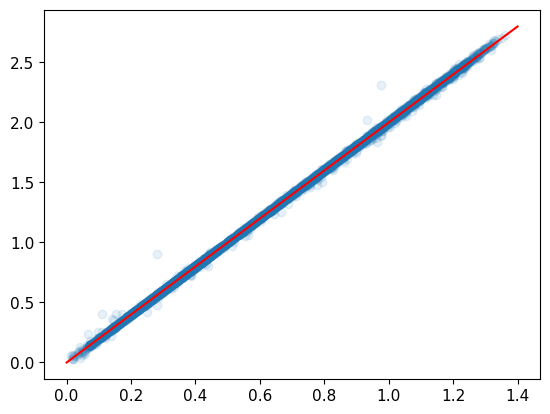

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size': 11})
import matplotlib.pyplot as plt

plt.scatter(oldE,newE,alpha = 0.1)
plt.plot(torch.linspace(0,1.4,steps=100),2*torch.linspace(0,1.4,steps=100),"r")

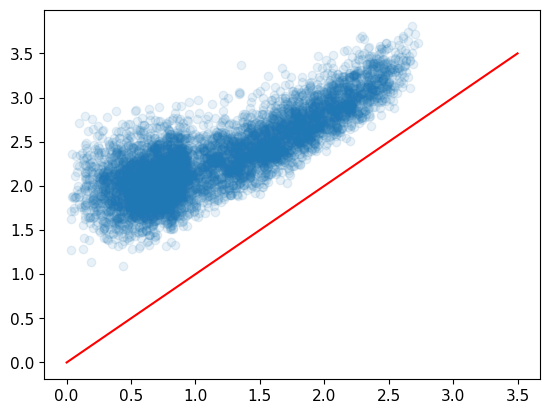

In [5]:
plt.scatter(newE,newI,alpha = 0.1)
plt.plot(torch.linspace(0,3.5,steps=100),torch.linspace(0,3.5,steps=100),"r")

## Compare $I(G,C)$ and $E(G,C)$

In [6]:
E_mean = []
ufE_mean = []
E_std = []
ufE_std = []

for i in range(60):
    indeces = ((i*0.06<=EGC_m_std[0,:,28,:]) & (EGC_m_std[0,:,28,:]<(i+1)*0.06)).nonzero(as_tuple=True)
    x_group = (EGC_m_std[0,:,28,:])[indeces]
    y_group = unstable[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        E_mean.append(torch.mean(x_group))
        E_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufE_mean.append(torch.mean(y_group))
        ufE_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of unstable communities')

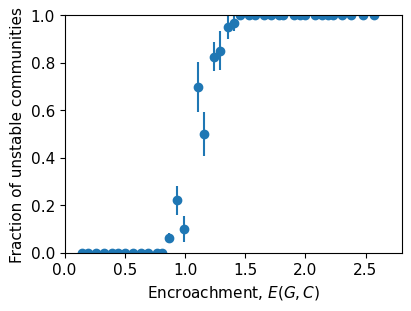

In [7]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(E_mean,ufE_mean, xerr=E_std, yerr= ufE_std, marker = 'o', ls='none')

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$') # new E
plt.ylabel('Fraction of unstable communities')

In [8]:
I_mean = []
ufI_mean = []
I_std = []
ufI_std = []

for i in range(70):
    indeces = ((i*0.06<=IGC_m_std[0,:,28,:]) & (IGC_m_std[0,:,28,:]<(i+1)*0.06)).nonzero(as_tuple=True)
    x_group = (IGC_m_std[0,:,28,:])[indeces]
    y_group = unstable[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        I_mean.append(torch.mean(x_group))
        I_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufI_mean.append(torch.mean(y_group))
        ufI_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

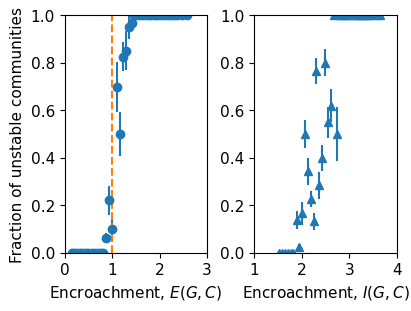

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(4, 3), constrained_layout=True)

axs[0].errorbar(E_mean,ufE_mean, xerr=E_std, yerr= ufE_std, marker = 'o', ls='none')
axs[0].plot(torch.linspace(1.0,1.0,steps=10), torch.linspace(0.0,1.0,steps=10),"--")
axs[1].errorbar(I_mean,ufI_mean, xerr=I_std, yerr= ufI_std, marker = '^', ls='none')

axs[0].set_xlim(0.0,3.0)
axs[0].set_ylim(.0,1.0)

axs[1].set_xlim(1.0,4.0)
axs[1].set_ylim(.0,1.0)

axs[0].set_xlabel('Encroachment, $E(G,C)$')
axs[1].set_xlabel('Encroachment, $I(G,C)$') # new I
axs[0].set_ylabel('Fraction of unstable communities')

plt.savefig('./figures/EandI.eps',format='eps')